## Business Case:-Prediciting the chances of admission with given features

In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('cpuestimation.csv')
data

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
data.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
data.tail()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47
208,wang,vs-90,480,1000,4000,0,0,0,45,25


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


## Basic understanding of features-- Domain Analysis

   1. vendor name: 30 
          (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
           dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
           microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
           sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer). It is our target or dependent variable.
  10. ERP: estimated relative performance from the original article (integer)

## Exploratory Data Analysis

### Univariate Analysis-- Analyzing single variable

In [3]:
## Renaming certain columns just to make analysis easy
data.rename(columns={'Model Name':'Model_Name','vendor name':'vendor_name'},inplace=True)


In [4]:
data.columns

Index(['vendor_name', 'Model_Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


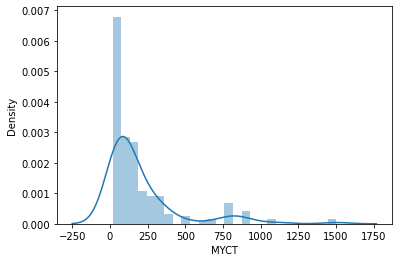

In [8]:
## ANalyszing MYCT

sns.distplot(data.MYCT.dropna(axis=0))
## normal distribution
## values are concentrated between 0 to 250
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


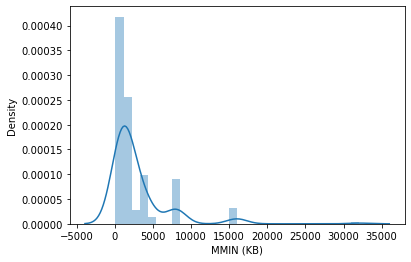

In [12]:
## ANalyszing MMIN: minimum main memory

sns.distplot(data.MMIN.dropna(axis=0),axlabel='MMIN (KB)')
## normal distribution
## values lying between 0 to 5000 KB
plt.show()

In [10]:
data.head()

,vendor_name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


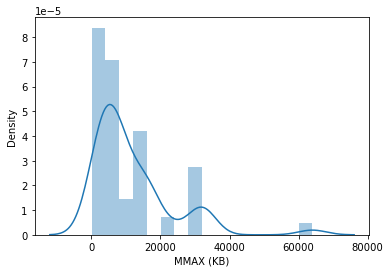

In [13]:
## ANalyszing MMAX: maximum main memory

sns.distplot(data.MMAX.dropna(axis=0),axlabel='MMAX (KB)')
## normal distribution
## values lying between 0 to 18000 KB
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


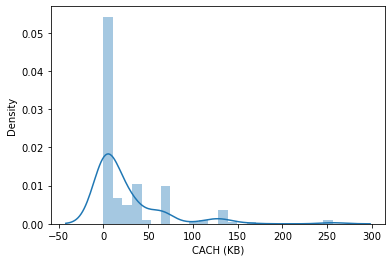

In [19]:
## ANalyszing CACH: cache memory

sns.distplot(data.CACH.dropna(axis=0),axlabel='CACH (KB)')
## normal distribution
## values lying between 0 to 45 KB
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


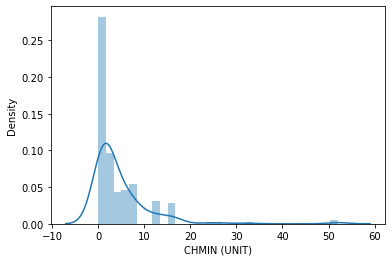

In [21]:
## ANalyszing CHMIN: minimum channels

sns.distplot(data.CHMIN.dropna(axis=0),axlabel='CHMIN (UNIT)')
## normal distribution
## values lying between 0 UNIT to 9 UNIT
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


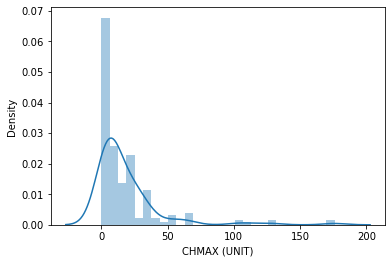

In [23]:
## ANalyszing CHMAX: maximum channels
sns.distplot(data.CHMAX.dropna(axis=0),axlabel='CHMAX (UNIT)')
## normal distribution
## values lying between 0 UNIT to 45 UNIT
plt.show()

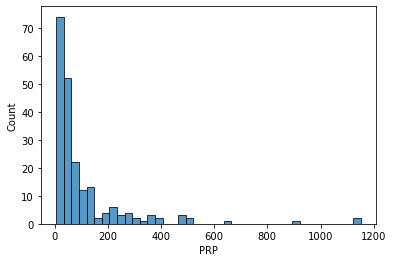

In [42]:
## ANalyszing PRP: published relative performance (Target Variable)
sns.histplot(x='PRP',data=data)
plt.show()
## Normally distribution
## values are contrated in range from 0 to 190
## there are outliers between 600 to 1200

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


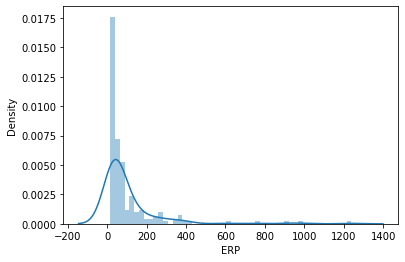

In [25]:
## ANalyszing ERP: Estimated relative performance
sns.distplot(data.ERP.dropna(axis=0),axlabel='ERP')
## normal distribution
## values lying between o to 200
plt.show()

## Bivariate Analysis-->Analyzing 2 variables at a time

In [44]:
data1=data[['MYCT', 'MMIN', 'MMAX', 
            'CACH','CHMIN', 'CHMAX']]

In [46]:
data1

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,125,256,6000,256,16,128
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,32000,32,8,32
4,29,8000,16000,32,8,16
...,...,...,...,...,...,...
204,124,1000,8000,0,1,8
205,98,1000,8000,32,2,8
206,125,2000,8000,0,2,14
207,480,512,8000,32,0,0


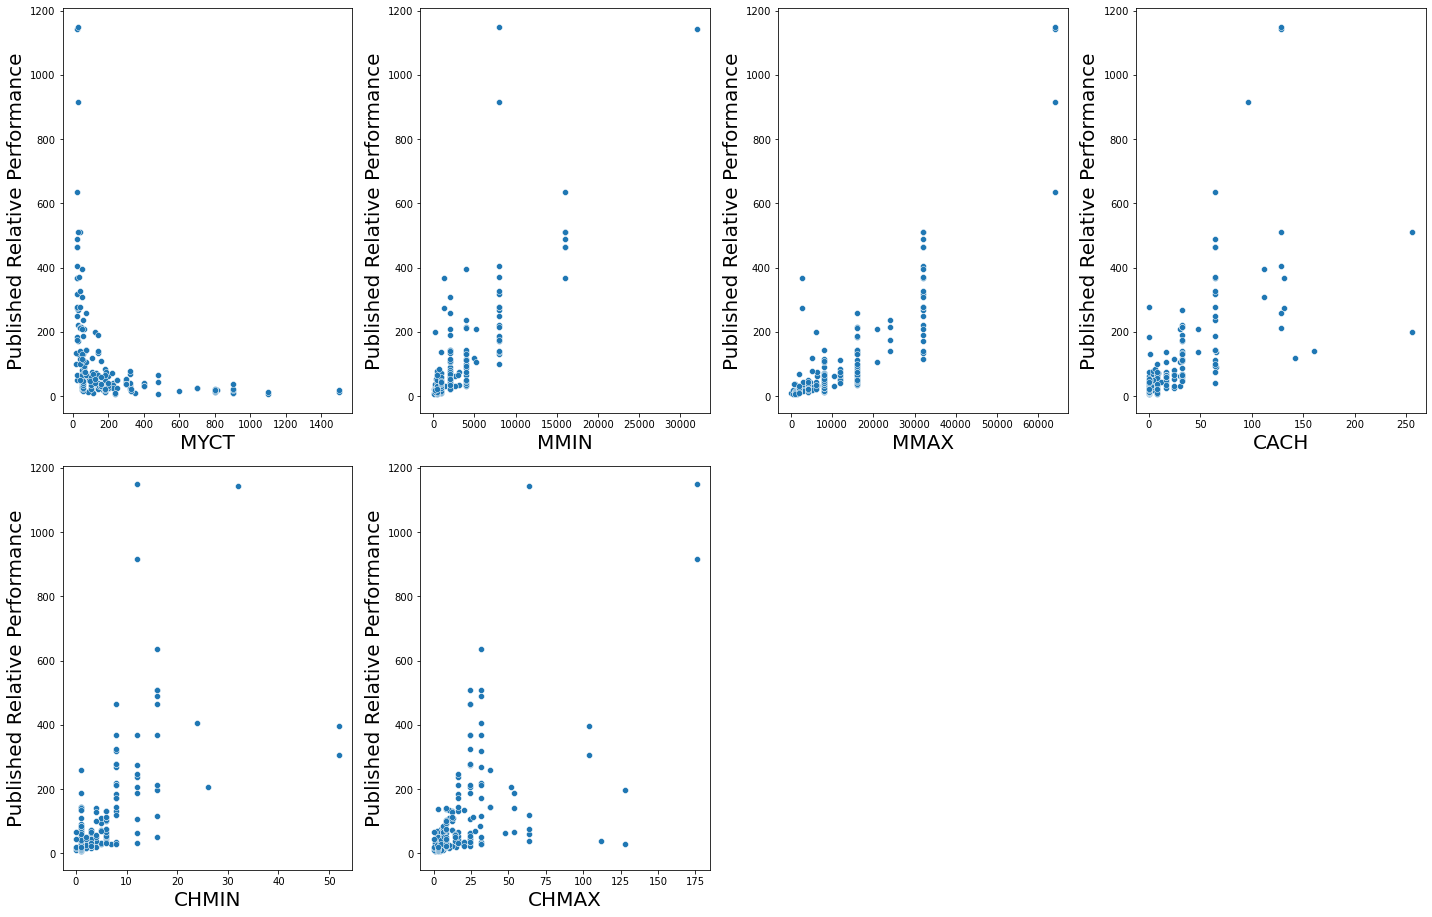

In [47]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=210 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column].dropna(axis=0)
                        ,y=data.PRP)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Published Relative Performance',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear. Thus, our linearity assumption is satisfied.

## Bivariate and Multivariate Analysis

### Data Preprocessing

In [48]:
## Checking missing values
data.isnull().sum()

vendor_name    0
Model_Name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

<bound method Series.max of 0     -0.303586
1     -0.673330
2     -0.673330
3     -0.673330
4     -0.673330
         ...   
204   -0.307438
205   -0.407576
206   -0.303586
207    1.063694
208    1.063694
Name: MYCT, Length: 209, dtype: float64>

In [49]:
## As in this dataset there is no null values, no missing values treatment is not needed

In [50]:
data.vendor_name.value_counts()

ibm             32
nas             19
sperry          13
honeywell       13
ncr             13
siemens         12
amdahl           9
cdc              9
burroughs        8
dg               7
harris           7
hp               7
ipl              6
c.r.d            6
dec              6
magnuson         6
prime            5
formation        5
cambex           5
gould            3
perkin-elmer     3
nixdorf          3
basf             2
wang             2
bti              2
apollo           2
sratus           1
four-phase       1
microdata        1
adviser          1
Name: vendor_name, dtype: int64

In [5]:
data.Model_Name.value_counts()

4381-2        1
4341-11       1
vs-100        1
3000/48       1
4331-2        1
             ..
100           1
dps:8/50      1
vax:11/730    1
as/3000       1
4361-5        1
Name: Model_Name, Length: 209, dtype: int64

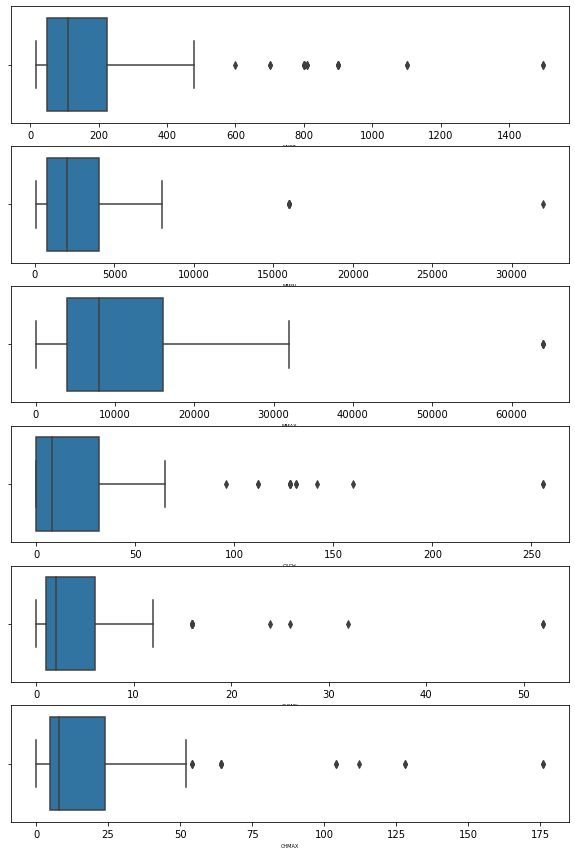

In [8]:
## Lets check outliers in any
box=data[['MYCT', 'MMIN','MMAX','CACH','CHMIN','CHMAX']]
plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=6 :     # as there are 9 columns in the data
        ax = plt.subplot(6,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=5)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()


### MYCT', 'MMIN','MMAX','CACH','CHMIN','CHMAX' every attribute is having some outliers, so outlier treatment is needed

In [9]:
## Skweness and Kurtosis test i.e check for normality
from scipy import stats
for column in box:
    print(stats.skew(box[column]),column)

2.5258570096766686 MYCT
3.4906489998203925 MMIN
2.1252682972972194 MMAX
2.8044632567259247 CACH
3.998370744836009 CHMIN
3.570045822323458 CHMAX


In [10]:
for column in box:
    print(stats.kurtosis(box[column]),column)

6.866357948150338 MYCT
17.166146158466574 MMIN
5.733634449940665 MMAX
10.005559787189116 CACH
21.906382649472228 CHMIN
15.481949779798086 CHMAX


In [11]:
## Scaling the data.As we will implement linear regression so we need to make all numerical features into same sacle.
## From the EDA stage we have found all numericla variables are normally distributed so we can apply 
## Standard scaler.

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler() ## object creation
data[['MYCT', 'MMIN','MMAX','CACH','CHMIN','CHMAX']]= sc.fit_transform(data[['MYCT', 'MMIN','MMAX','CACH','CHMIN','CHMAX']])

In [13]:
data.head()

,vendor_name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,198,199
1,amdahl,470v/7,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,269,253
2,amdahl,470v/7a,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,220,253
3,amdahl,470v/7b,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,172,253
4,amdahl,470v/7c,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,132,132


## Feature Selection

In [14]:
## Feature selection is done to get that specific features which are important to predict the 
## the target varaible.

## First remove the redundant colunms i.e vendpr_name,Model_name,ids
## In second step remove constant columns,the columns not providing information.
## i.e standard deviation=0

In [15]:
## Dropping columns that are not required
data.drop(['Model_Name','vendor_name'],axis=1,inplace=True)

In [16]:
data.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,198,199
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,269,253
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,220,253
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,172,253
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,132,132


In [17]:
##checking the constant feature
data.describe()
##there is no constant feature in the given dataset

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,2.090000e+02,209.000000,209.000000
mean,-2.974760e-17,-9.880454e-17,1.046478e-16,-8.818039e-17,2.231070e-17,4.249658e-18,105.622010,99.330144
std,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,1.002401e+00,160.830733,154.757102
min,-7.195474e-01,-7.246454e-01,-1.002879e+00,-6.218817e-01,-6.909708e-01,-7.043728e-01,6.000000,15.000000
25%,-5.924482e-01,-5.427075e-01,-6.664246e-01,-6.218817e-01,-5.439108e-01,-5.115835e-01,27.000000,28.000000
50%,-3.613585e-01,-2.243162e-01,-3.244998e-01,-4.245039e-01,-3.968508e-01,-3.959099e-01,50.000000,45.000000
75%,8.156321e-02,2.925528e-01,3.593499e-01,1.676295e-01,1.913890e-01,2.210159e-01,113.000000,101.000000
max,4.992217e+00,7.528719e+00,4.462448e+00,5.694208e+00,6.956148e+00,6.081811e+00,1150.000000,1238.000000


<AxesSubplot:>

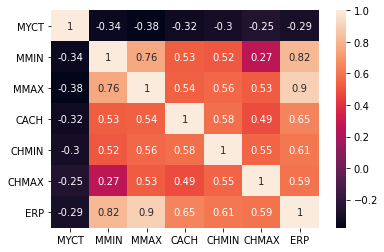

In [19]:
## Third step is Checking correlation i.e checking the linear relation between 2 variables.
sns.heatmap(data.drop('PRP',axis=1).corr(),annot=True)

In [20]:
## Here ERP and MMAX are highly correlated, i.e. threshold value is 0.9, so we can drop any one of the feature

In [21]:
data.drop(['ERP'],axis=1,inplace=True)

In [22]:
data.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033,198
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,269
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,220
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479,172
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447,132


## Model Building

In [23]:
## Definig independent and dependent variables
X=data.iloc[:,0:-1]
y=data.PRP

In [25]:
y


0      198
1      269
2      220
3      172
4      132
      ... 
204     42
205     46
206     52
207     67
208     45
Name: PRP, Length: 209, dtype: int64

In [26]:
X

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,-0.303586,-0.675026,-0.495462,5.694208,1.661989,4.231033
1,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479
2,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479
3,-0.673330,1.326291,1.727049,0.167629,0.485509,0.529479
4,-0.673330,1.326291,0.359350,0.167629,0.485509,-0.087447
...,...,...,...,...,...,...
204,-0.307438,-0.482751,-0.324500,-0.621882,-0.543911,-0.395910
205,-0.407576,-0.482751,-0.324500,0.167629,-0.396851,-0.395910
206,-0.303586,-0.224316,-0.324500,-0.621882,-0.396851,-0.164563
207,1.063694,-0.608867,-0.324500,0.167629,-0.690971,-0.704373


In [38]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [39]:
## Model creation
from sklearn.linear_model import LinearRegression ## importing the model library 

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.
y_hat=LR.predict(X_test) ## prediciton from model

In [30]:
y_hat

array([ 1.01064974e+02, -2.31175668e-01,  8.91624015e+00,  7.30279535e+02,
        4.10391237e+01,  3.07920466e+02,  3.82541418e+01, -1.82524036e+01,
        8.69517954e+02,  2.78047508e+02,  1.09631342e+02,  1.30524354e+02,
        4.57706101e+01,  3.68828803e+01,  1.05925609e+02,  2.52180466e+01,
        1.14779354e+02,  3.63692038e+00,  1.88659583e+02,  1.12301607e+02,
        8.26578617e+01,  5.08396931e+01,  1.47965955e+02,  2.94175473e+01,
        3.61350439e+00,  3.53701280e+01, -1.13490463e+01,  8.04054378e+00,
        2.55709518e+00,  7.58821316e+01,  2.97991127e+02,  3.33397927e+01,
        1.53620438e+01, -1.53638726e+01, -1.78762798e+00,  3.74535633e+01,
        4.41357316e+01,  3.99469115e+02,  2.30392956e+02, -3.62231681e+00,
        4.00423061e+02,  5.63035731e+01])

In [40]:
## Model Evaluation
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.8378284557995717

In [41]:
test_score=r2_score(y_test,y_hat)
test_score

0.8893455830696774

In [42]:
X_train.shape,X_test.shape

((167, 6), (42, 6))

In [44]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.83)*(167-1)/(167-6-1)
train_adjusted_r2

0.8236249999999999

In [45]:
test_adjusted_r2= 1-(1-0.88)*(42-1)/(42-6-1)
test_adjusted_r2

0.8594285714285714

 watching the tested adjusted r2 value, we can conclude that this is a good model

In [46]:
print('intercept:', LR.intercept_) ## c value

intercept: 104.10037910428169


In [47]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

slope: [11.1011942  42.93557178 69.81663155 25.18163026  2.79941723 35.86490986]
